<a href="https://colab.research.google.com/github/uyan21/deepLearningStudy/blob/main/horse_human_iden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이게 지금 말인가 사람인가

In [2]:
#필요한 라이브러리 임포트한다.
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dense,Conv2D,Flatten,MaxPooling2D,Dropout
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(1000, 300, 300, 3) (1000,)


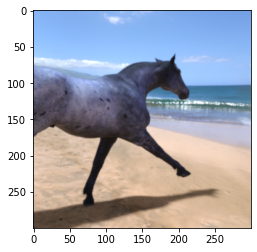

In [3]:
#말과 사람 사진이 섞인 데이터를 다운 받음 (tensorflow에서 제공함)
ds=tfds.load('horses_or_humans',split='train',shuffle_files=True)
#1000개 받아서 섞어서 넣는다
ds = ds.shuffle(1024).batch(1000).prefetch(tf.data.experimental.AUTOTUNE)
#이미지와 답 따로 저장 (image,label 키로 된 딕셔너리 구조임)
for i in ds.take(1):
  x, y = i["image"], i["label"]
print(x.shape,y.shape)
#시험 삼아 이미지 1EA 출력해본다
plt.imshow(x[0])

In [4]:
#트레인 테스트 각각 나눈다 7:3
#과적합 방지하기 위함임
x_train=x[:700]
x_test=x[700:]
y_train=y[:700]
y_test=y[700:]
#데이터 정규화
x_train=np.asarray(x_train)/255
x_test=np.asarray(x_test)/255
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700, 300, 300, 3) (300, 300, 300, 3) (700,) (300,)


In [5]:

#이거는
#이미지 데이터를 conv2D 레이어를 써서 학습 시키면 정확도는 좋은데
#너무 오래 걸리기 때문에 속도 올려보려고 Dense 레이어만 가지고 해보려고
#배열 변환 했던 코드
"""
x_train=x_train.reshape(x_train.shape[0],300*300,3)
x_test=x_test.reshape(x_test.shape[0],300*300,3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
"""

(700, 300, 300, 3) (300, 300, 300, 3) (700,) (300,)


In [5]:
#레이어 쌓기 시작 
#img(300,300)-Conv2D(16)->Conv2D(32)->MP2D->Flatten(90000)->Dense(512)->Dense(1)->1(말이면 0, 사람이면 1)

model=Sequential()
model.add(Conv2D(16,(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu'))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 298, 298, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 710432)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               363741696 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#Conv2D 쓰면 원래 오래걸림
model.fit(x_train,y_train,epochs=2,batch_size=10)

Epoch 1/2
70/70 [==============================] - 269s 4s/step - loss: 4.5174 - accuracy: 0.8371
Epoch 2/2
70/70 [==============================] - 266s 4s/step - loss: 0.0271 - accuracy: 0.9914


In [8]:
#과적합이 약간 발생했지만 정확성은 높다.
model.evaluate(x_test,y_test)

10/10 [==============================] - 14s 1s/step - loss: 0.0358 - accuracy: 0.9900


[0.03576462343335152, 0.9900000095367432]